In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = gpd.read_file('/data/acker/ALA/NA/NAv5_GWRPM25_mean2015-2017_test_GL.shp')
#df = gpd.read_file('/data/acker/ALA/NA/NAv5_GWRPM25_mean2016-2018_99th.shp')
df

,lat,lon,GWRPM25,geometry
0,14.005,-91.455,29.433334,POINT (-91.455 14.005)
1,14.005,-91.445,29.500000,POINT (-91.445 14.005)
2,14.005,-91.435,29.433334,POINT (-91.435 14.005)
3,14.005,-91.425,29.300001,POINT (-91.425 14.005)
4,14.005,-91.415,29.199999,POINT (-91.415 14.005)
...,...,...,...,...
24962430,67.995,-64.735,0.366667,POINT (-64.735 67.995)
24962431,67.995,-64.725,0.366667,POINT (-64.725 67.995)
24962432,67.995,-64.715,0.366667,POINT (-64.715 67.995)
24962433,67.995,-64.705,0.366667,POINT (-64.705 67.995)


In [2]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [27]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

# Display the filtered counties
counties_conus

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,031,00350302,0500000US13031,13031,Bulloch,Bulloch County,GA,Georgia,06,1750735216,32827779,"POLYGON ((-82.02684 32.55516, -82.02527 32.558..."
1,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
2,13,179,00357095,0500000US13179,13179,Liberty,Liberty County,GA,Georgia,06,1337654102,222884791,"POLYGON ((-81.8244 32.01488, -81.81338 32.0162..."
3,13,189,00348794,0500000US13189,13189,McDuffie,McDuffie County,GA,Georgia,06,666590014,23114032,"POLYGON ((-82.64852 33.60838, -82.64409 33.606..."
4,13,213,01688005,0500000US13213,13213,Murray,Murray County,GA,Georgia,06,892235145,5719644,"POLYGON ((-84.94434 34.68004, -84.9431 34.6804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,41,049,01135860,0500000US41049,41049,Morrow,Morrow County,OR,Oregon,06,5259046087,44372730,"POLYGON ((-120.00631 45.27648, -120.00556 45.3..."
3229,21,073,00516883,0500000US21073,21073,Franklin,Franklin County,KY,Kentucky,06,538312209,10786432,"POLYGON ((-85.02426 38.13059, -85.02299 38.131..."
3230,17,201,01785216,0500000US17201,17201,Winnebago,Winnebago County,IL,Illinois,06,1328792556,15873993,"POLYGON ((-89.40142 42.50043, -89.37175 42.500..."
3231,17,123,00424260,0500000US17123,17123,Marshall,Marshall County,IL,Illinois,06,1001843226,30364348,"POLYGON ((-89.63869 40.98691, -89.63868 40.988..."


In [28]:
counties_conus = counties_conus.drop(["COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [29]:
counties_conus = counties_conus.to_crs(df.crs)

In [6]:
import geopandas as gpd
import pandas as pd

# Parameters
chunk_size = 10000  # Adjust this based on your memory capacity

# Initialize an empty list to store results
results = []

# Iterate over chunks of the data
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    chunk_result = gpd.sjoin(chunk, counties_conus[['GEOID', 'geometry','STATEFP','COUNTYFP']], how="left", predicate="within")
    chunk_result.dropna(subset=['GEOID'], inplace=True)  # Drop rows where GEOID is NaN in this chunk
    results.append(chunk_result)

# Concatenate all chunk results
df_counties = pd.concat(results, ignore_index=True)


In [7]:
df_counties

,lat,lon,GWRPM25,geometry,index_right,GEOID,STATEFP,COUNTYFP
0,18.915,-155.675,6.166667,POINT (-155.675 18.915),269.0,15001,15,001
1,18.925,-155.675,6.000000,POINT (-155.675 18.925),269.0,15001,15,001
2,18.925,-155.665,5.900000,POINT (-155.665 18.925),269.0,15001,15,001
3,18.925,-155.655,5.800000,POINT (-155.655 18.925),269.0,15001,15,001
4,18.935,-155.675,5.933333,POINT (-155.675 18.935),269.0,15001,15,001
...,...,...,...,...,...,...,...,...
10390163,67.995,-141.045,3.533334,POINT (-141.045 67.995),2780.0,02290,02,290
10390164,67.995,-141.035,3.500000,POINT (-141.035 67.995),2780.0,02290,02,290
10390165,67.995,-141.025,3.466666,POINT (-141.025 67.995),2780.0,02290,02,290
10390166,67.995,-141.015,3.400000,POINT (-141.015 67.995),2780.0,02290,02,290


In [54]:
large = df_counties[df_counties['GWRPM25'] >= 22]
large

,lat,lon,GWRPM25,geometry,index_right,GEOID,STATEFP,COUNTYFP
1059127,32.785,-106.345,24.866667,POINT (-106.345 32.785),2945.0,35035,35,035
1059128,32.785,-106.335,24.900000,POINT (-106.335 32.785),2945.0,35035,35,035
1059129,32.785,-106.325,24.966667,POINT (-106.325 32.785),2945.0,35035,35,035
1059130,32.785,-106.315,25.000000,POINT (-106.315 32.785),2945.0,35035,35,035
1059131,32.785,-106.305,25.033333,POINT (-106.305 32.785),2945.0,35035,35,035
...,...,...,...,...,...,...,...,...
5183871,41.765,-123.535,22.766668,POINT (-123.535 41.765),119.0,06093,06,093
5183879,41.765,-123.455,22.466667,POINT (-123.455 41.765),119.0,06093,06,093
5188965,41.775,-123.555,23.333334,POINT (-123.555 41.775),119.0,06093,06,093
5188966,41.775,-123.545,22.900000,POINT (-123.545 41.775),119.0,06093,06,093


In [25]:
large.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

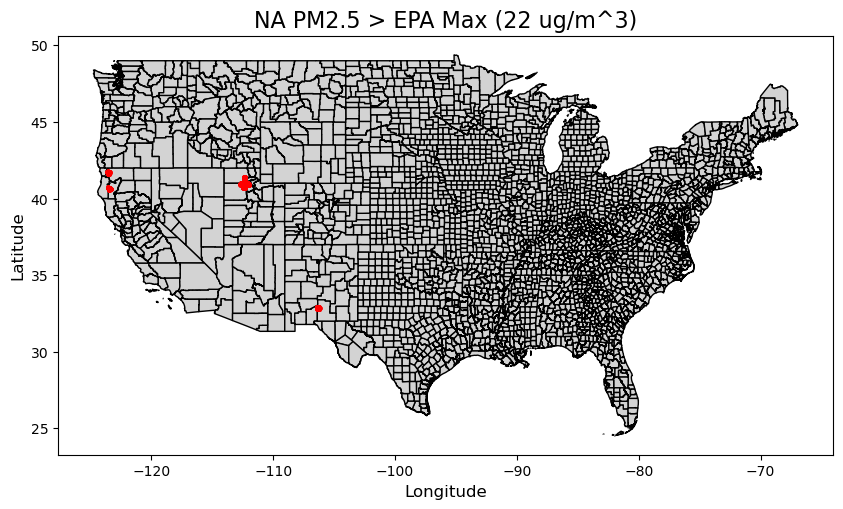

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas.tools import overlay

# Load U.S. map shapefile (example uses 'naturalearth_lowres')
us_map = counties_conus

# Load your GeoDataFrame (replace 'your_geodataframe' with your actual data)
gdf = large  # Replace with your loaded GeoDataFrame

# Ensure CRS matches (assuming both are in EPSG:4326)
gdf = gdf.set_crs(epsg=4269)
us_map = us_map.to_crs(epsg=4269)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
us_map.plot(ax=ax, color='lightgray', edgecolor='black')  # Plot U.S. map
gdf.plot(ax=ax, color='red', markersize=5)  # Plot points from GeoDataFrame

# Add titles and labels
plt.title('NA PM2.5 > EPA Max (22 ug/m^3)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


In [30]:
# Group by GEOID and calculate the 90th percentile of GWRPM25 for each county
#county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].quantile(0.9).reset_index()
county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].max().reset_index()
#county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].mean().reset_index()


# Rename the column for clarity
county_90th_percentile = county_90th_percentile.rename(columns={'GWRPM25': 'PM25_90th'})

# Display the result
print(county_90th_percentile)


      GEOID  PM25_90th
0     01001   8.700000
1     01003   9.266666
2     01005   8.200000
3     01007   8.366667
4     01009   8.466666
...     ...        ...
3137  56037   6.366667
3138  56039   5.866667
3139  56041   6.866666
3140  56043   6.366667
3141  56045  10.066667

[3142 rows x 2 columns]


In [31]:
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
county_90th_percentile_with_geometry = county_90th_percentile.merge(counties[['GEOID', 'geometry','STATEFP','COUNTYFP']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
county_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')

# Display the result
print(county_90th_percentile_with_geometry)


      GEOID  PM25_90th                                           geometry  \
0     01001   8.700000  POLYGON ((-86.9212 32.65754, -86.92035 32.6585...   
1     01003   9.266666  POLYGON ((-88.02858 30.22676, -88.02399 30.230...   
2     01005   8.200000  POLYGON ((-85.74803 31.61918, -85.74544 31.618...   
3     01007   8.366667  POLYGON ((-87.42194 33.00338, -87.33177 33.005...   
4     01009   8.466666  POLYGON ((-86.96336 33.85822, -86.95967 33.857...   
...     ...        ...                                                ...   
3137  56037   6.366667  POLYGON ((-110.05438 42.01103, -110.05436 42.0...   
3138  56039   5.866667  POLYGON ((-111.05361 44.66627, -110.75076 44.6...   
3139  56041   6.866666  POLYGON ((-111.04663 41.14012, -111.04662 41.1...   
3140  56043   6.366667  POLYGON ((-108.55063 44.15179, -108.55056 44.1...   
3141  56045  10.066667  POLYGON ((-105.08123 43.65128, -105.0808 43.71...   

     STATEFP COUNTYFP  
0         01      001  
1         01      003  
2  

In [32]:
# epa CDVs for pearson
gdf_epa = pd.read_csv('/data/acker/EPA_DV/2015-2017.csv')

In [33]:
gdf_epa

,State FIPS,County FIPS,State,County,2015-2017
0,1,3,AL,Baldwin,7.7
1,1,27,AL,Clay,7.8
2,1,33,AL,Colbert,7.9
3,1,49,AL,DeKalb,8.3
4,1,55,AL,Etowah,8.7
...,...,...,...,...,...
534,56,35,WY,Sublette,5.1
535,56,37,WY,Sweetwater,5.1
536,56,39,WY,Teton,4.6
537,72,61,PR,Guaynabo,NaN


In [34]:
gdf_epa.rename(columns={'2015-2017': 'Design Value'}, inplace=True)

In [35]:

# Function to add leading zero to 11-digit codes
def add_leading_zero(code):
    code_str = str(code).strip()
    if len(code_str) == 1:
        ret = '0' + code_str
        return ret
    return code_str

In [36]:
# Iterate through each block group ID in ejscreen and update if necessary
for i in range(len(gdf_epa)):
    gdf_epa.at[i, 'State FIPS'] = add_leading_zero(gdf_epa.at[i, 'State FIPS'])

# Iterate through each block group ID in ejscreen and update if necessary
for i in range(len(gdf_epa)):
    gdf_epa.at[i, 'County FIPS'] = add_leading_zero(gdf_epa.at[i, 'County FIPS'])


/tmp/ipykernel_226703/958764295.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '01' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_epa.at[i, 'State FIPS'] = add_leading_zero(gdf_epa.at[i, 'State FIPS'])
/tmp/ipykernel_226703/958764295.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '03' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_epa.at[i, 'County FIPS'] = add_leading_zero(gdf_epa.at[i, 'County FIPS'])


In [37]:

# Function to add leading zero to 11-digit codes
def add_leading_zero(code):
    code_str = str(code).strip()
    if len(code_str) == 2:
        ret = '0' + code_str
        return ret
    return code_str


for i in range(len(gdf_epa)):
    gdf_epa.at[i, 'County FIPS'] = add_leading_zero(gdf_epa.at[i, 'County FIPS'])


In [38]:
county_90th_percentile_with_geometry.columns

Index(['GEOID', 'PM25_90th', 'geometry', 'STATEFP', 'COUNTYFP'], dtype='object')

In [39]:
import numpy as np

# Set values that are 0 in 'Design Value' to NaN in gdf_epa
gdf_epa.loc[gdf_epa['Design Value'] == 0, 'Design Value'] = np.nan

# Drop rows where 'Design Value' is NaN, so only counties with valid EPA data remain
gdf_epa.dropna(subset=['Design Value'], inplace=True)

# Step 1: Create a unique identifier combining 'STUSPS' and 'NAME' for both datasets
gdf_epa['ID'] = gdf_epa['State FIPS'] + "_" + gdf_epa['County FIPS']
county_90th_percentile_with_geometry['ID'] = county_90th_percentile_with_geometry['STATEFP'] + "_" + county_90th_percentile_with_geometry['COUNTYFP']

# Step 2: Identify IDs with valid values in gdf_epa
epa_ids = gdf_epa['ID'].unique()

# Step 3: Identify unmonitored counties
unmonitored_counties = county_90th_percentile_with_geometry[
    ~county_90th_percentile_with_geometry['ID'].isin(epa_ids)
]

# Step 4: Update PM25_90th in county_90th_percentile_with_geometry to NaN for IDs not in epa_ids
county_90th_percentile_with_geometry.loc[
    ~county_90th_percentile_with_geometry['ID'].isin(epa_ids), 'PM25_90th'
] = np.nan


In [40]:
len(epa_ids)

537

In [41]:
unmonitored_counties

,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,ID
0,01001,8.700000,"POLYGON ((-86.9212 32.65754, -86.92035 32.6585...",01,001,01_001
2,01005,8.200000,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",01,005,01_005
3,01007,8.366667,"POLYGON ((-87.42194 33.00338, -87.33177 33.005...",01,007,01_007
4,01009,8.466666,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",01,009,01_009
5,01011,8.233333,"POLYGON ((-85.99926 32.25018, -85.98655 32.250...",01,011,01_011
...,...,...,...,...,...,...
3132,56027,9.533334,"POLYGON ((-104.89994 43.49964, -104.78095 43.5...",56,027,56_027
3134,56031,6.766666,"POLYGON ((-105.28651 42.60583, -105.25054 42.6...",56,031,56_031
3139,56041,6.866666,"POLYGON ((-111.04663 41.14012, -111.04662 41.1...",56,041,56_041
3140,56043,6.366667,"POLYGON ((-108.55063 44.15179, -108.55056 44.1...",56,043,56_043


In [42]:
county_90th_percentile_with_geometry.dropna(inplace=True)

In [43]:
# Rank counties from highest to lowest based on PM25_90th values
county_ranked_epa = gdf_epa.sort_values(by='Design Value', ascending=False).reset_index(drop=True)
county_ranked_epa.reset_index(inplace=True)
county_ranked_epa['Design Value']

0      22.2
1      17.3
2      16.5
3      15.7
4      15.1
       ... 
532     3.7
533     3.7
534     3.5
535     3.1
536     3.0
Name: Design Value, Length: 537, dtype: float64

In [44]:
# Rank counties from highest to lowest based on PM25_90th values
county_ranked = county_90th_percentile_with_geometry.sort_values(by='PM25_90th', ascending=False).reset_index(drop=True)
county_ranked.reset_index(inplace=True)
county_ranked

,index,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,ID
0,0,49011,52.433334,"POLYGON ((-112.45162 41.08733, -112.19934 41.1...",49,011,49_011
1,1,35013,45.600002,"POLYGON ((-107.29963 32.60537, -107.2994 32.76...",35,013,35_013
2,2,49035,35.066666,"POLYGON ((-112.26022 40.76909, -112.19598 40.8...",49,035,49_035
3,3,49003,33.333332,"POLYGON ((-114.04255 41.21092, -114.0414 41.21...",49,003,49_003
4,4,06093,27.366669,"POLYGON ((-123.71845 41.59796, -123.7188 41.59...",06,093,06_093
...,...,...,...,...,...,...,...
532,532,38053,4.500000,"POLYGON ((-104.04533 47.34345, -104.04488 47.3...",38,053,38_053
533,533,38025,4.333333,"POLYGON ((-103.09967 47.67452, -103.03607 47.6...",38,025,38_025
534,534,08067,4.266666,"POLYGON ((-108.37961 37.00418, -108.37643 37.0...",08,067,08_067
535,535,15003,3.400000,"MULTIPOLYGON (((-157.65982 21.32857, -157.6588...",15,003,15_003


In [50]:
np.nanmean(gdf_epa['Design Value'])

7.943947858472999

In [55]:
np.nanmean(county_90th_percentile_with_geometry['PM25_90th'])

9.038237157036694

In [57]:
county_90th_percentile_with_geometry[county_90th_percentile_with_geometry['PM25_90th'] > 7.94]

,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,ID
1,01003,9.266666,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",01,003,01_003
13,01027,8.233334,"POLYGON ((-86.17416 33.11241, -86.17392 33.121...",01,027,01_027
16,01033,8.533334,"POLYGON ((-88.13925 34.5878, -88.13872 34.5892...",01,033,01_033
24,01049,8.633334,"POLYGON ((-86.11889 34.40384, -86.11002 34.403...",01,049,01_049
27,01055,9.566667,"POLYGON ((-86.36962 33.94118, -86.36804 33.942...",01,055,01_055
...,...,...,...,...,...,...
3059,55025,8.233334,"POLYGON ((-89.83856 42.94994, -89.83854 42.955...",55,025,55_025
3076,55059,8.333333,"POLYGON ((-88.30589 42.61082, -88.30252 42.610...",55,059,55_059
3087,55079,8.599999,"POLYGON ((-88.06976 42.86261, -88.06959 42.867...",55,079,55_079
3114,55133,8.033334,"POLYGON ((-88.54215 42.90499, -88.54206 42.927...",55,133,55_133


In [56]:
gdf_epa[gdf_epa['Design Value'] > 7.94]

,State FIPS,County FIPS,State,County,Design Value,ID
3,01,049,AL,DeKalb,8.3,01_049
4,01,055,AL,Etowah,8.7,01_055
6,01,073,AL,Jefferson,11.0,01_073
8,01,097,AL,Mobile,8.1,01_097
9,01,101,AL,Montgomery,8.8,01_101
...,...,...,...,...,...,...
509,54,069,WV,Ohio,8.8,54_069
510,54,107,WV,Wood,8.5,54_107
513,55,025,WI,Dane,8.0,55_025
520,55,079,WI,Milwaukee,8.3,55_079


In [47]:
import numpy as np
from scipy.stats import rankdata

# Merge the two DataFrames on 'GEOID' to get matched pairs for CDV and CDVE
# CDV (CDV) = Design Value from county_ranked_epa
# CDVE (calculated satellite value) = PM25_90th from county_ranked
merged_df = county_ranked.merge(county_ranked_epa[['ID', 'Design Value']], on='ID', how='inner')

# Drop rows with NaN values in either column, only keep counties with both values
merged_df.dropna(subset=['PM25_90th', 'Design Value'], inplace=True)

# Extract CDV and CDVE values for correlation calculations
cdv = merged_df['Design Value'].values  # EPA Design Values (CDV)
cdve = merged_df['PM25_90th'].values  # 90th percentile PM2.5 values (CDVE)

# Calculate Pearson correlation coefficient
cdv_mean = np.mean(cdv)
cdve_mean = np.mean(cdve)
numerator = np.sum((cdv - cdv_mean) * (cdve - cdve_mean))
denominator = np.sqrt(np.sum((cdv - cdv_mean)**2) * np.sum((cdve - cdve_mean)**2))
pearson_correlation = numerator / denominator

# Calculate Spearman rank correlation coefficient
cdv_ranks = rankdata(cdv, method='min')
cdve_ranks = rankdata(cdve, method='min')
d_i = cdv_ranks - cdve_ranks
n = len(cdv)
spearman_numerator = 6 * np.sum(d_i**2)
spearman_denominator = n * (n**2 - 1)
spearman_correlation = 1 - (spearman_numerator / spearman_denominator)

# Print the results
print("Pearson Correlation Coefficient (r):", pearson_correlation)
print("Spearman Rank Correlation Coefficient (r_s):", spearman_correlation)


Pearson Correlation Coefficient (r): 0.4076751705403552
Spearman Rank Correlation Coefficient (r_s): 0.7273394377823247


In [48]:
from scipy.stats import pearsonr, spearmanr

pearson_r, _ = pearsonr(cdv, cdve)
spearman_r, _ = spearmanr(cdv, cdve)

print("Pearson Correlation (scipy):", pearson_r)
print("Spearman Correlation (scipy):", spearman_r)

Pearson Correlation (scipy): 0.40767517054035524
Spearman Correlation (scipy): 0.7280604505202473


In [49]:
merged_df

,index,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,ID,Design Value
0,0,49011,52.433334,"POLYGON ((-112.45162 41.08733, -112.19934 41.1...",49,011,49_011,7.8
1,1,35013,45.600002,"POLYGON ((-107.29963 32.60537, -107.2994 32.76...",35,013,35_013,9.0
2,2,49035,35.066666,"POLYGON ((-112.26022 40.76909, -112.19598 40.8...",49,035,49_035,8.7
3,3,49003,33.333332,"POLYGON ((-114.04255 41.21092, -114.0414 41.21...",49,003,49_003,7.2
4,4,06093,27.366669,"POLYGON ((-123.71845 41.59796, -123.7188 41.59...",06,093,06_093,7.8
...,...,...,...,...,...,...,...,...
532,532,38053,4.500000,"POLYGON ((-104.04533 47.34345, -104.04488 47.3...",38,053,38_053,3.7
533,533,38025,4.333333,"POLYGON ((-103.09967 47.67452, -103.03607 47.6...",38,025,38_025,5.8
534,534,08067,4.266666,"POLYGON ((-108.37961 37.00418, -108.37643 37.0...",08,067,08_067,4.9
535,535,15003,3.400000,"MULTIPOLYGON (((-157.65982 21.32857, -157.6588...",15,003,15_003,4.2


In [82]:
merged_df[merged_df['ID'] == '55_025']

,index,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,ID,Design Value
338,338,55025,8.233334,"POLYGON ((-89.83856 42.94994, -89.83854 42.955...",55,025,55_025,8.0


In [83]:
import pandas as pd

# Load your data into a DataFrame
# Assuming the DataFrame is already loaded and named `df`
gdf_epa.sort_values(by='ID', ascending=True, inplace=True)
county_90th_percentile_with_geometry.sort_values(by='ID', ascending=True, inplace=True)

# Drop rows with NaN in either the CDV or CDVE columns
filtered_df = gdf_epa.copy()
# Calculate the difference (bias for each row)
filtered_df['Difference'] = county_90th_percentile_with_geometry['PM25_90th'].values - gdf_epa['Design Value'].values

# Calculate the median bias instead of the mean
bias_median = filtered_df['Difference'].median()
print(filtered_df['Difference'].describe())
# Check for NaN values in the Difference column
print("NaN values in Difference:", filtered_df['Difference'].isna().sum())


# Calculate the bias range (min and max differences)
bias_min = filtered_df['Difference'].min()
bias_max = filtered_df['Difference'].max()

print(f"Bias (median): {bias_median:.2f} µg/m³")
print(f"Bias range: {bias_min:.2f} µg/m³ to {bias_max:.2f} µg/m³")


count    537.000000
mean       1.094289
std        3.445196
min       -7.733333
25%        0.099999
50%        0.600000
75%        1.266666
max       44.633334
Name: Difference, dtype: float64
NaN values in Difference: 0
Bias (median): 0.60 µg/m³
Bias range: -7.73 µg/m³ to 44.63 µg/m³


In [39]:
filtered_df['Difference'].isna().sum()

0